<a href="https://www.kaggle.com/code/dalloliogm/beyond-visible-spectrum-challenge-2-eda?scriptVersionId=240455396" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# EDA of Spectral Data

This notebook uses the spectral package to visualize the images in the training set.

I am absolutely a novice analyzing this type of data, so this is my first effort.



In [1]:
%%capture 
!pip install -q spectral


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import spectral as spy
import matplotlib.pyplot as plt
import math

In [3]:

# Function to Visualize Spectral images
def visualize_hyperspectral(image_id, dataset="Train", mode="rgb", bands=(60, 30, 10)):
    # Load the .npy file
    image_folder = image_id[0]
    file_path = f"/kaggle/input/beyond-visible-spectrum-ai-for-agriculture-2025p2/{dataset}/{image_folder}/{image_id}.npy"
    image_data = np.load(file_path)

    if image_data.ndim != 3:
        raise ValueError("Expected a 3D hyperspectral image (H, W, C)")

    H, W, C = image_data.shape

    if mode == "rgb":
        # Show false-color RGB image using selected bands
        if max(bands) >= C:
            raise ValueError(f"Bands {bands} exceed available channels (0–{C-1})")
        view = spy.imshow(image_data, bands=bands)
        plt.title(f"False RGB Composite (bands={bands})")
        plt.show()

    elif mode == "grid":
        # Show all bands in a grid
        grid_size = int(math.ceil(math.sqrt(C)))
        fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
        axes = axes.flatten()
        for i in range(C):
            ax = axes[i]
            ax.imshow(image_data[:, :, i], cmap='gray')
            ax.axis('off')
            ax.set_title(f'Band {i+1}', fontsize=6)
        for j in range(C, len(axes)):
            axes[j].axis('off')
        plt.tight_layout()
        plt.show()

    elif mode == "interactive":
        # Launch SPy interactive viewer
        view = spy.imshow(image_data, bands=bands)
        print("Click on a pixel in the viewer to see its spectral signature.")
        return view

    else:
        raise ValueError("Invalid mode. Choose from 'rgb', 'grid', or 'interactive'.")


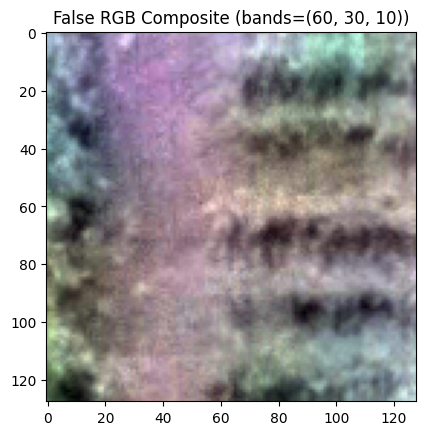

In [4]:
visualize_hyperspectral("0100", mode="rgb")

In [5]:
#visualize_hyperspectral("0100", mode="pca")

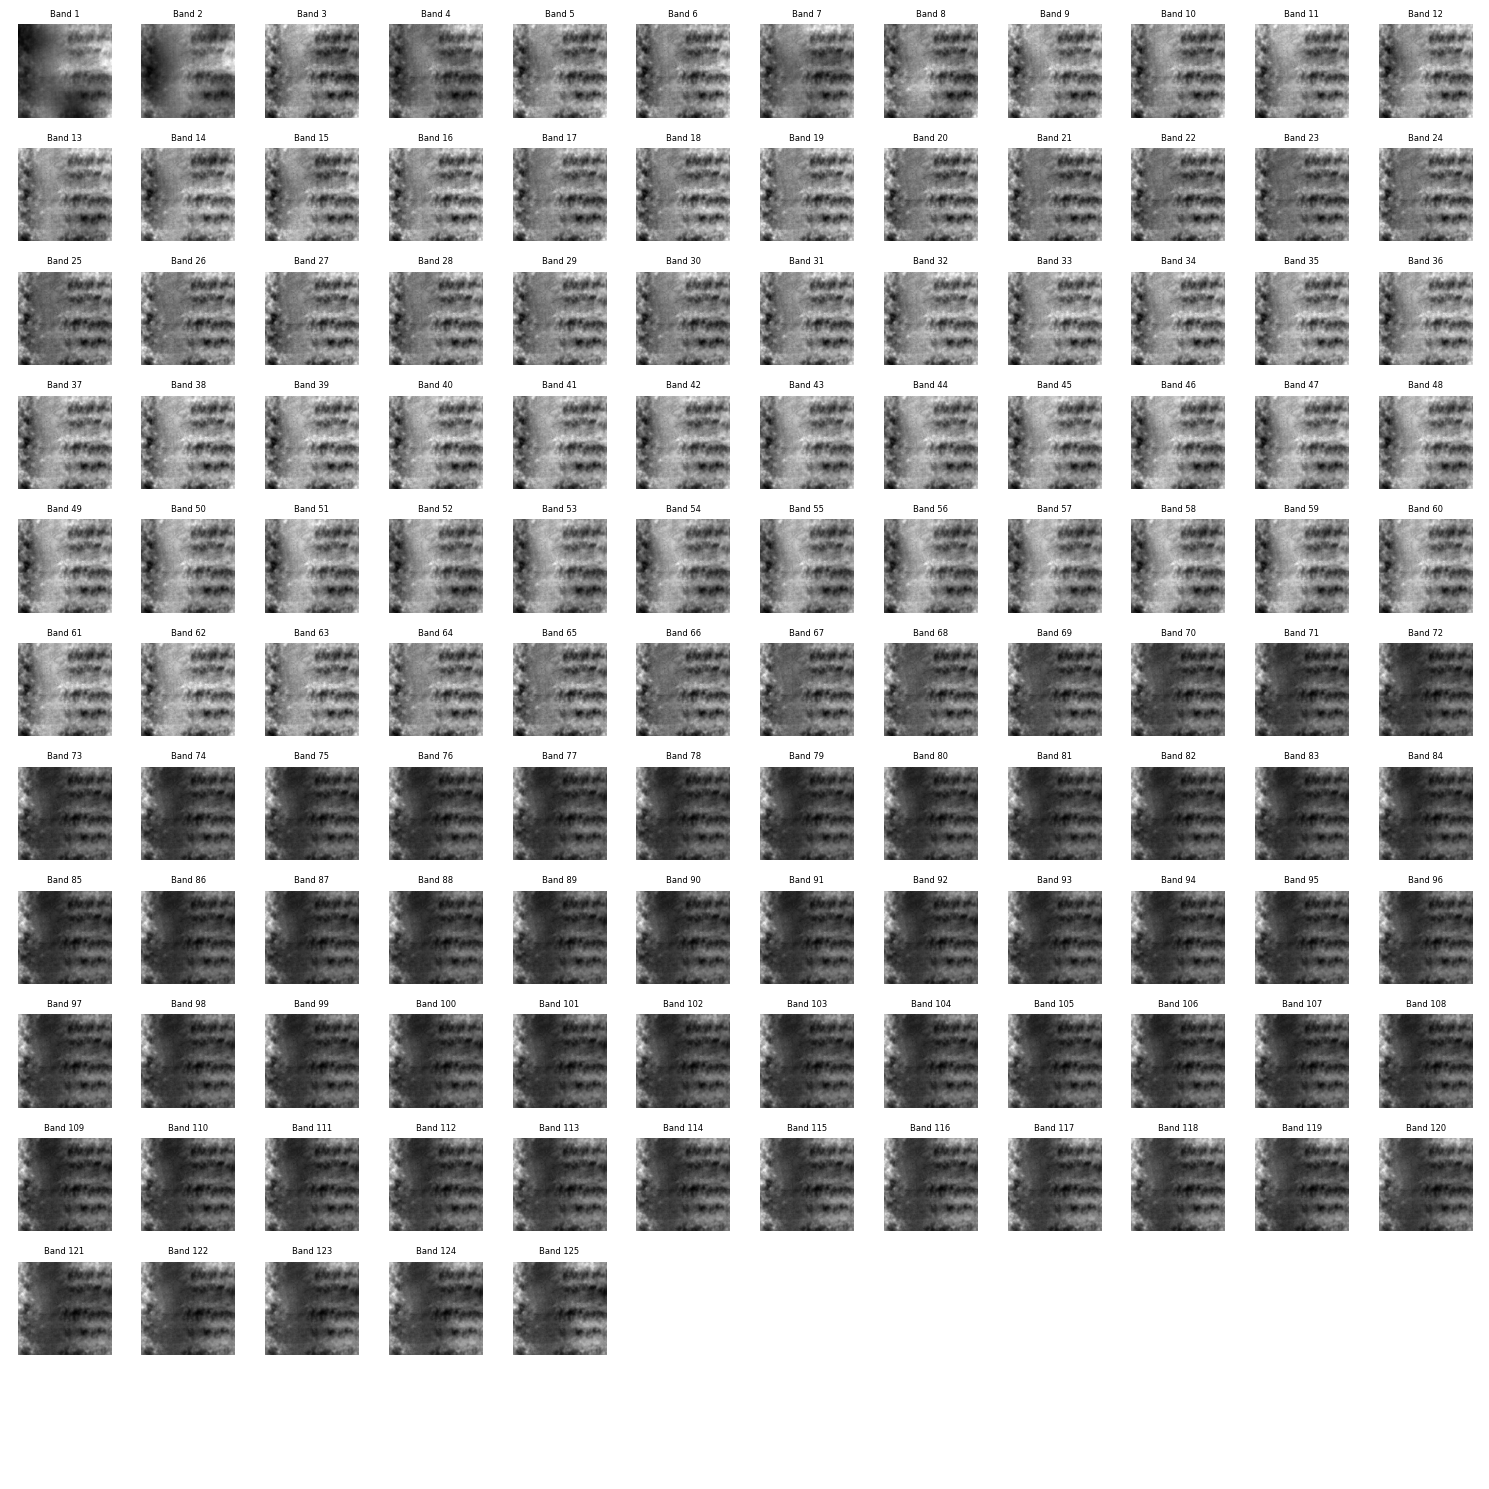

In [6]:
visualize_hyperspectral("0100", mode="grid")